Predict behavior to retain customers, analyze all relevant customer data and develop focused customer retention programs.

### Dataset

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

- Customers who left within the last month - Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
# Read dataset
df = pd.read_csv("./Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,1769-GRUIK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [4]:
# Missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not also, it increases the dimensionality.



In [5]:
df.drop(["customerID"], inplace=True, axis=1)

In [6]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan).astype(float)

# all those records for whom the total charges are missing are newly joined customers
# their charges can be replaced by 0
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0

### Visualization

In [7]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (15, 4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["olive", "orange"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

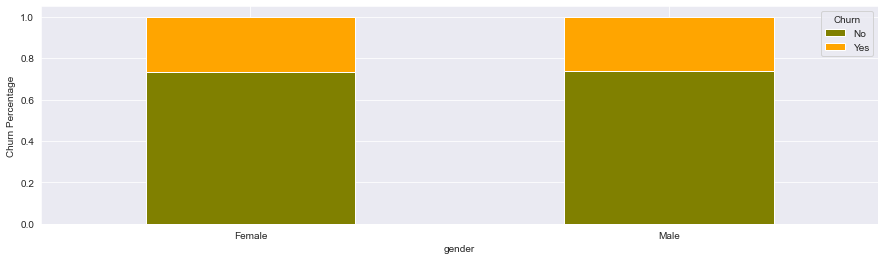

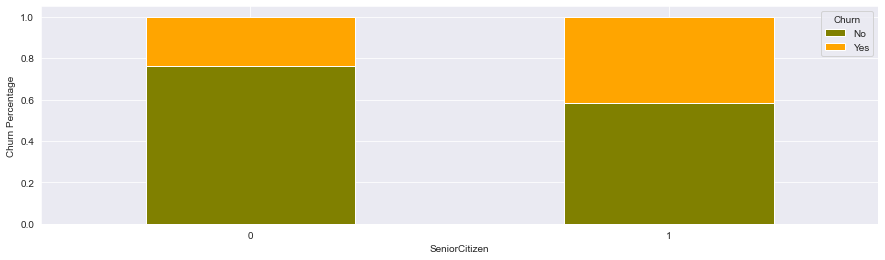

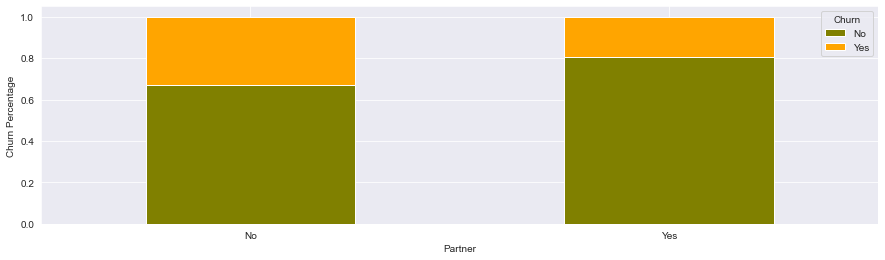

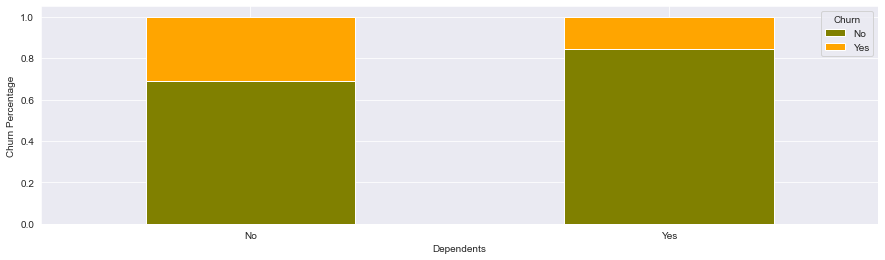

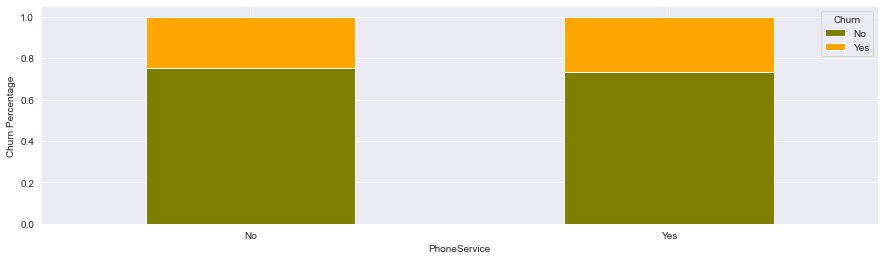

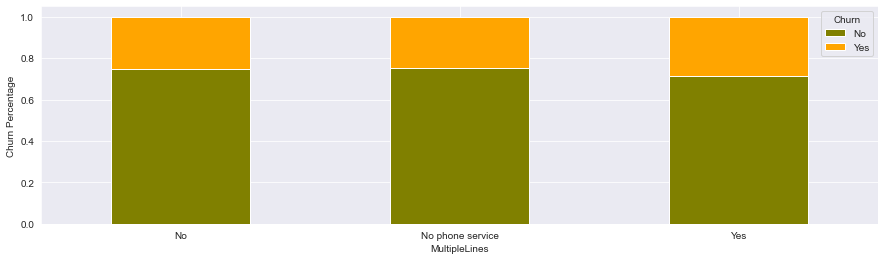

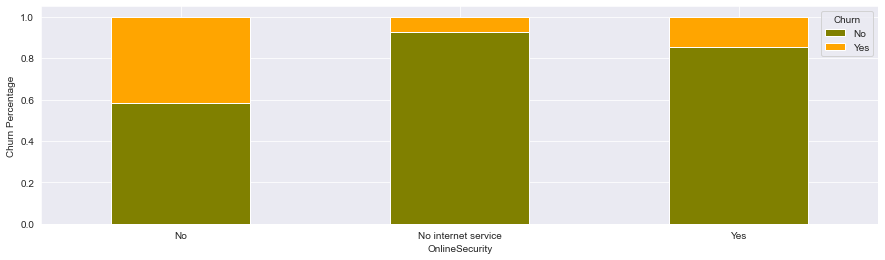

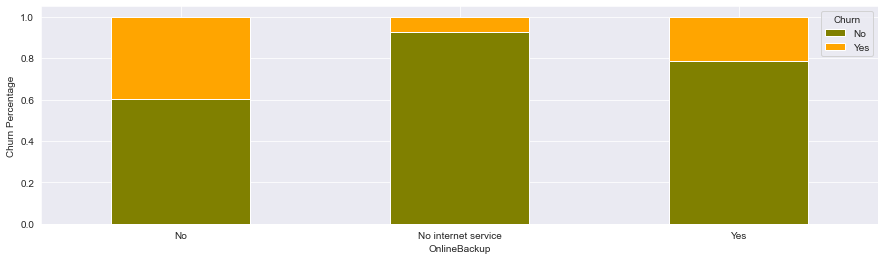

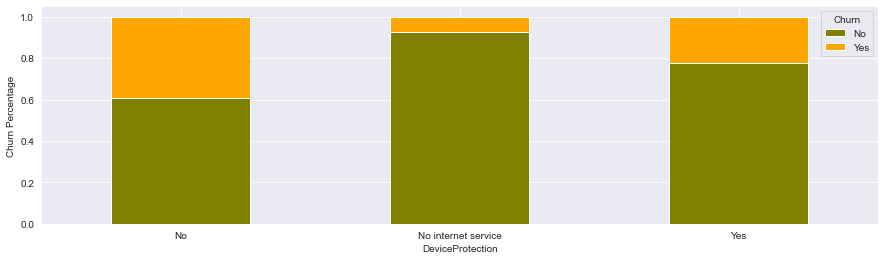

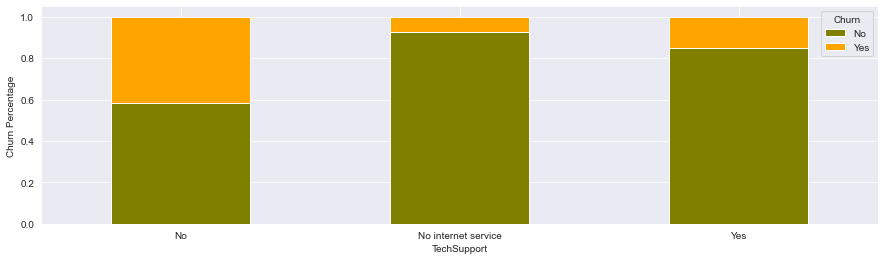

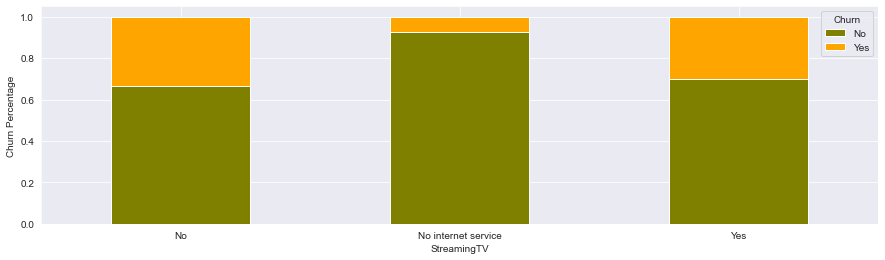

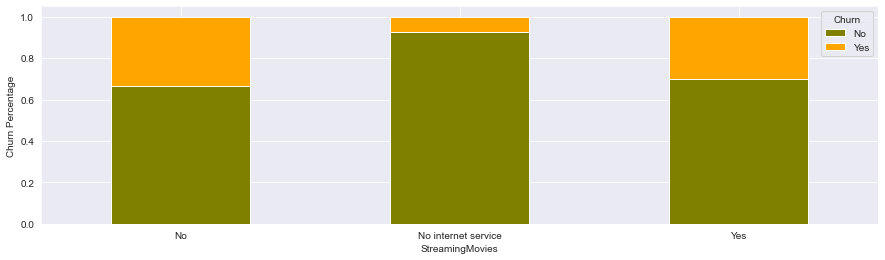

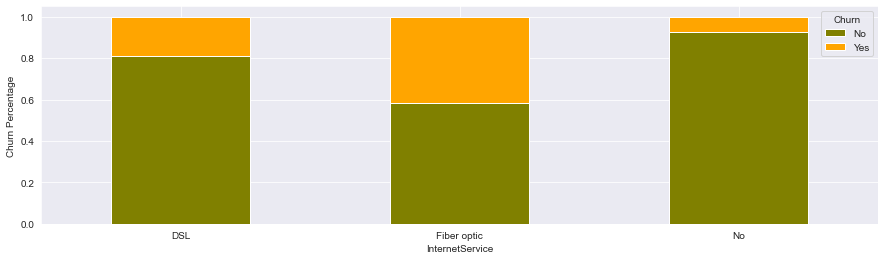

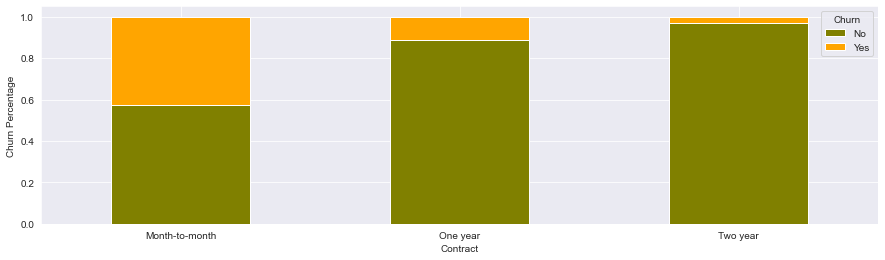

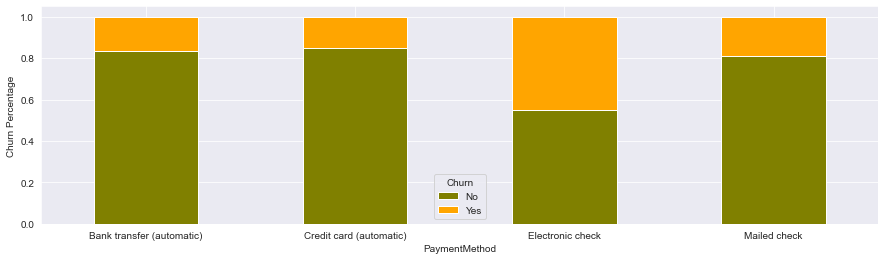

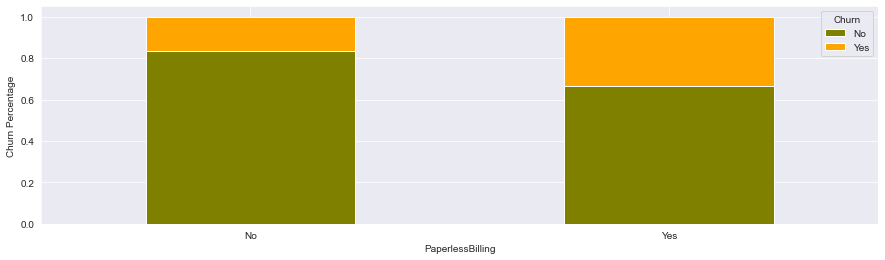

In [8]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")
stacked_plot(df, "PhoneService", "Churn")
stacked_plot(df, "MultipleLines", "Churn")
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")
stacked_plot(df, "InternetService", "Churn")
stacked_plot(df, "Contract", "Churn")
stacked_plot(df, "PaymentMethod", "Churn")
stacked_plot(df, "PaperlessBilling", "Churn")


- If a person is young, has a partner, or has dependents, they are less likely to stop the service.
- Columns gender, multiplelines, and phoneservice do not add any direct value to differentiate the churn likelihood.
- If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. 
- If they have internet service and does not opt for specific service their probability of churning is high.
- When the internet service is Fiber Optic, the churn rate is very high.
- In the case of Month-to-month contract, churn rate is very high. 
- In the case of Electronic check, churn is very high.





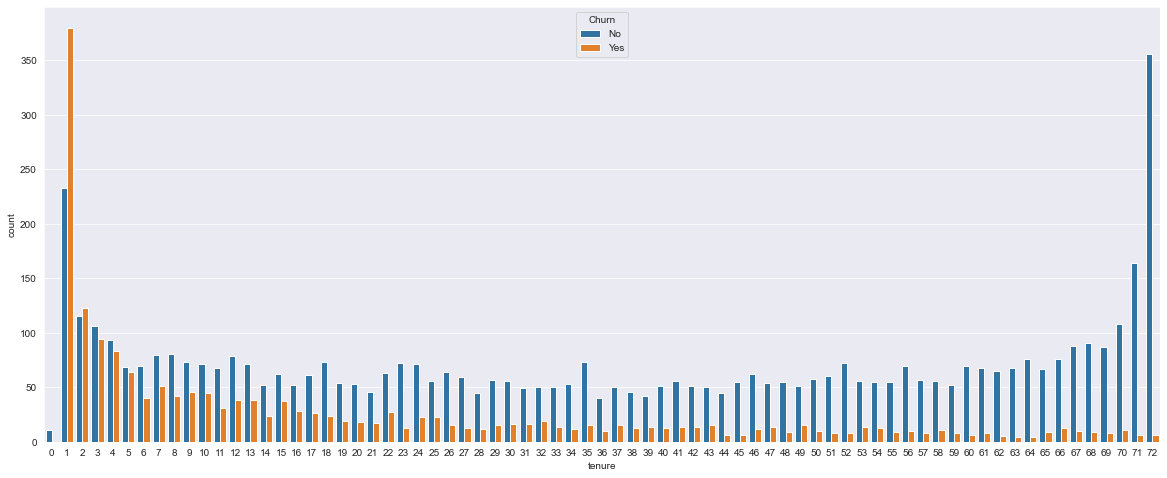

In [9]:
plt.figure(figsize=(20, 8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

The higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.


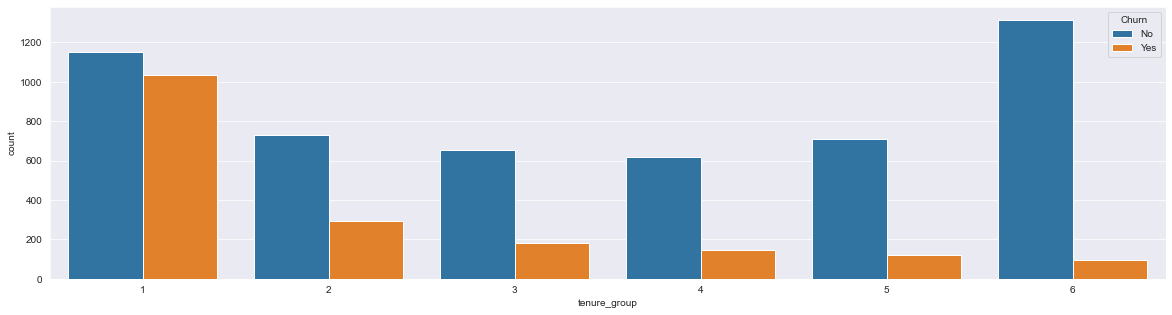

1    2186
6    1407
2    1024
5     832
3     832
4     762
Name: tenure_group, dtype: int64

In [10]:
# Converting tenure into 5 buckets 
def encode_tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: encode_tenure(x)).astype('uint8')

plt.figure(figsize=(20, 5))
sns.countplot(x="tenure_group", hue="Churn", data=df)
plt.show()

df["tenure_group"].value_counts()



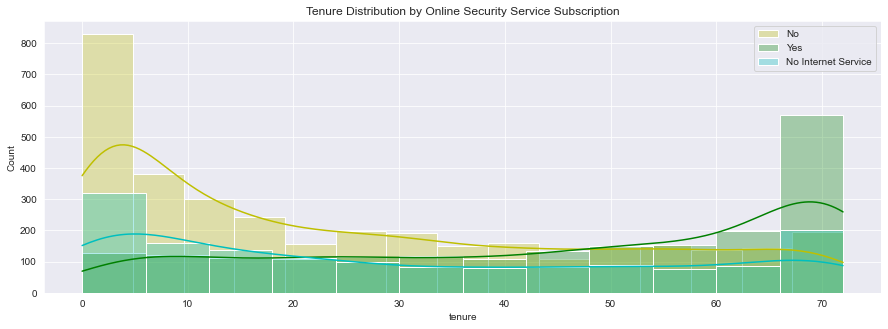

In [11]:
plt.figure(figsize=(15, 5))
sns.histplot(df.tenure[df.OnlineSecurity == "No"], alpha=0.3, label="No", kde=True, color='y')
sns.histplot(df.tenure[df.OnlineSecurity == "Yes"], alpha=0.3, label="Yes", kde=True, color='g')
sns.histplot(df.tenure[df.OnlineSecurity == "No internet service"], alpha=0.3, label="No Internet Service", kde=True, color='c')
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

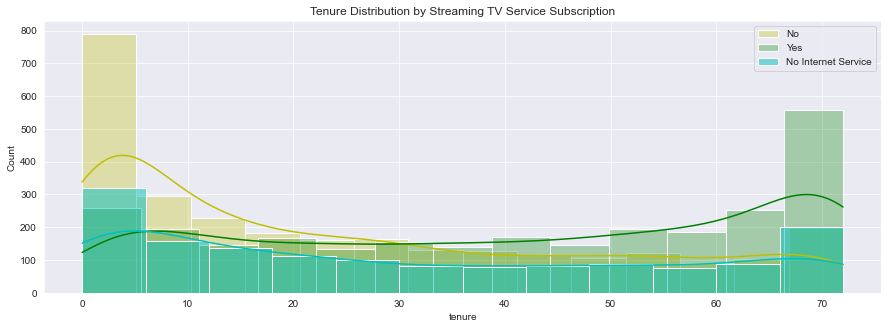

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(df.tenure[df.StreamingTV == "No"], alpha=0.3, label="No", kde=True, color='y')
sns.histplot(df.tenure[df.StreamingTV == "Yes"], alpha=0.3, label="Yes", kde=True, color='g')
sns.histplot(df.tenure[df.StreamingTV == "No internet service"], label="No Internet Service", kde=True, color='c')
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

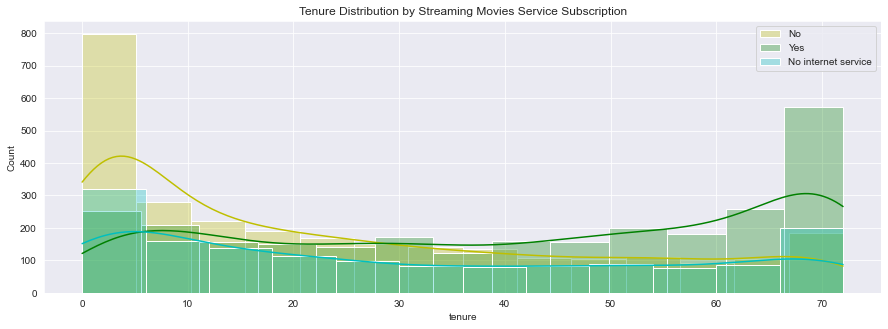

In [13]:
plt.figure(figsize=(15, 5))
sns.histplot(df.tenure[df.StreamingMovies == "No"], alpha=0.3, label="No", kde=True, color='y')
sns.histplot(df.tenure[df.StreamingMovies == "Yes"], alpha=0.3, label="Yes", kde=True, color='g')
sns.histplot(df.tenure[df.StreamingMovies == "No internet service"], alpha=0.3, label="No internet service", kde=True, color='c')
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

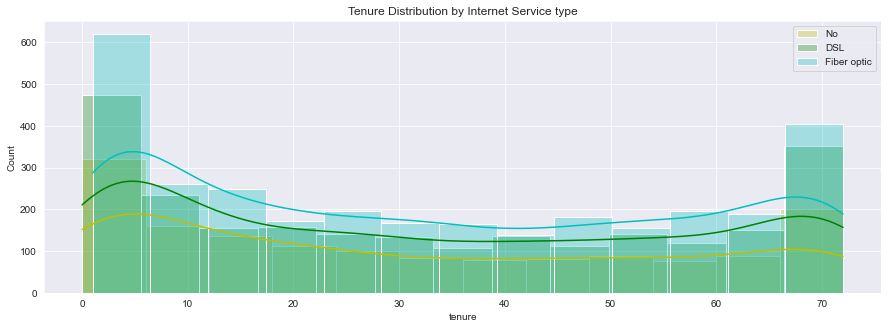

In [14]:
plt.figure(figsize=(15, 5))
sns.histplot(df.tenure[df.InternetService == "No"], alpha=0.3, label="No", kde=True, color='y')
sns.histplot(df.tenure[df.InternetService == "DSL"], alpha=0.3, label="DSL", kde=True, color='g')
sns.histplot(df.tenure[df.InternetService == "Fiber optic"], alpha=0.3, label="Fiber optic", kde=True, color='c')
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

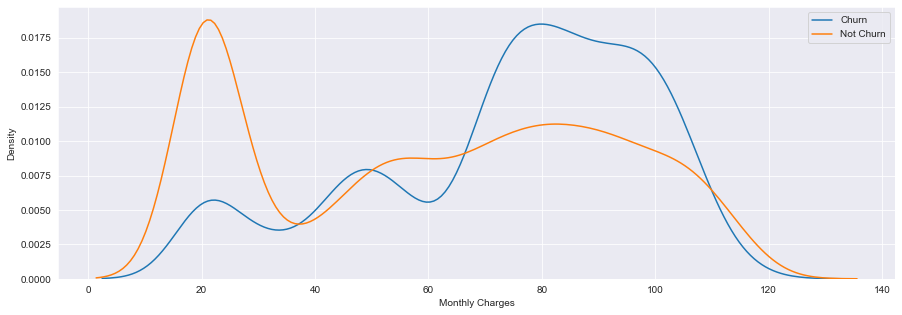

In [15]:
plt.figure(figsize=(15, 5))
sns.kdeplot(df[df.Churn=="Yes"]["MonthlyCharges"],label = "Churn")
sns.kdeplot(df[df.Churn=="No"]["MonthlyCharges"], label = "Not Churn")
plt.xlabel("Monthly Charges")
plt.legend()
plt.show()

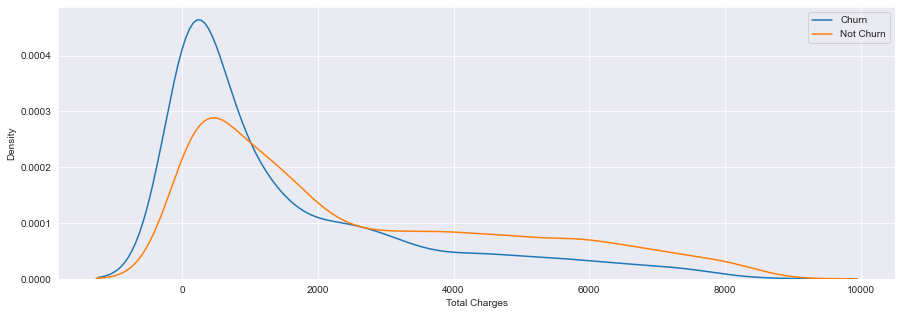

In [16]:
plt.figure(figsize=(15, 5))
sns.kdeplot(df[df.Churn=="Yes"]["TotalCharges"],label = "Churn")
sns.kdeplot(df[df.Churn=="No"]["TotalCharges"], label = "Not Churn")
plt.xlabel("Total Charges")
plt.legend()
plt.show()

#### Further preparing the data

In [17]:
cols = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
for col in cols:
    df[col] = df[col].apply(lambda x: 0 if x == "No" else 1).astype('uint8')

df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1).astype('uint8')

df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1}).astype('uint8')

cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols:
    df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1}).astype('uint8')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   uint8  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   uint8  
 3   Dependents        7043 non-null   uint8  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   uint8  
 6   MultipleLines     7043 non-null   uint8  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   uint8  
 9   OnlineBackup      7043 non-null   uint8  
 10  DeviceProtection  7043 non-null   uint8  
 11  TechSupport       7043 non-null   uint8  
 12  StreamingTV       7043 non-null   uint8  
 13  StreamingMovies   7043 non-null   uint8  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   uint8  
 16  PaymentMethod     7043 non-null   object 


# Customer Survival Analysis


If time to event has the probability density function $f(t)$ and cumulative distribution function $F(t)$, then the probability of surviving at least to time $t$ is: 

$Pr(T>t)=S(t)=1-F(t)$. 

Cumulative hazard at time t is defined as $H(t)=-ln(S(t))$ and instantaneous hazard at time $t$ is 

$h(t)=\frac{dH(t)}{dt}$ 
    
The instantateous hazard can also be written as 

$h(t)=\frac{f(t)}{S(t)}$

The likelihood function for survival analysis is described as:

$$ l(\beta) = \prod_{n=1}^{n} h(t_{i})^{d_{i}} S(t_{i}) $$
    
where $d_i$ is the censoring variable that equals to 1 if the event is observed for individual $i$ and 0 if the event is not observed (censored) for individual $i$, $h(t_i)$ is the hazard for individual $i$ at time $t$, $H(t_i)$ is the cumulative hazard for individual $i$ at time $t$, and $S(t_i)$ is the survival probability for individual $i$ at time $t$. 

Note that when $d_i=0$, the contribution of the $i$'th individual to the likelihood function is just its survival probability until time $t$: S(t). 

If the individual has seen the event, the contribution to the likelihood function is given by the density function $f(t)=h(t)S(t)$.

The log of likelihood is:

$$ logl(\beta) = \sum_{i=1}^n d_i log(h(t_i)) - H(t_i) $$

where $log$ is the natural logarithm."

Survival analysis was originally developed and applied heavily by the actuarial and medical community. Its purpose was to answer why do events occur now versus later under uncertainty (where events might refer to deaths, disease remission, etc.). 

This is great for researchers who are interested in measuring lifetimes: they can answer questions like what factors might influence deaths?

But outside of medicine and actuarial science, there are many other interesting and exciting applications of survival analysis. For example:

- SaaS providers are interested in measuring subscriber lifetimes, or time to some first action
- inventory stock out is a censoring event for true "demand" of a good.
- sociologists are interested in measuring political parties' lifetimes, or relationships, or marriages
- A/B tests to determine how long it takes different groups to perform an action.

"lifelines" is a pure Python implementation of the best parts of survival analysis.

In [19]:
# !pip install lifelines

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as st
from sklearn.preprocessing import LabelEncoder

from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test   
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [21]:
eventvar = df['Churn']
timevar = df['tenure']

In [22]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

survivaldata = pd.get_dummies(df, columns = categorical, drop_first= True)

# Drop variables such as tenure, Churn as they are not needed in survival data. 
# Also, we need to add constant for survival analysis.
survivaldata.drop(['tenure', 'Churn'], axis = 1, inplace= True)
survivaldata = st.add_constant(survivaldata, prepend=False)
survivaldata.head()

,MonthlyCharges,TotalCharges,tenure_group,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,InternetService_Fiber optic,...,TechSupport_1,StreamingTV_1,StreamingMovies_1,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,29.85,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1.0
1,56.95,1889.50,3,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1.0
2,53.85,108.15,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1.0
3,42.30,1840.75,4,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1.0
4,70.70,151.65,1,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1.0


### Kaplan-Meier method

The Kaplan-Meier method calculates the probability of survival at time 𝑡  as:

$$ S(t) = \prod_{i=1}^{t-1} (1 - \frac{d_i}{n_i}) $$

where,
- 𝑆(𝑡) is the probability of survival until time 𝑡,
- $𝑑_𝑖$  is the number of units that experienced the event at time 𝑡,  
- $𝑛_𝑖$  is the number of units at risk of experiencing the event at time 𝑡.  

$𝑛_𝑖$ decreases with time, as units experience the event or are censored. 

$\frac{d_i}{n_i}$ is the probability of experiencing the event at time 𝑖

$(1− \frac{d_i}{n_i})$ is the probability of surviving at time 𝑖. 

Note that this method does not use any parameters, it only depends on the data on time and censoring.

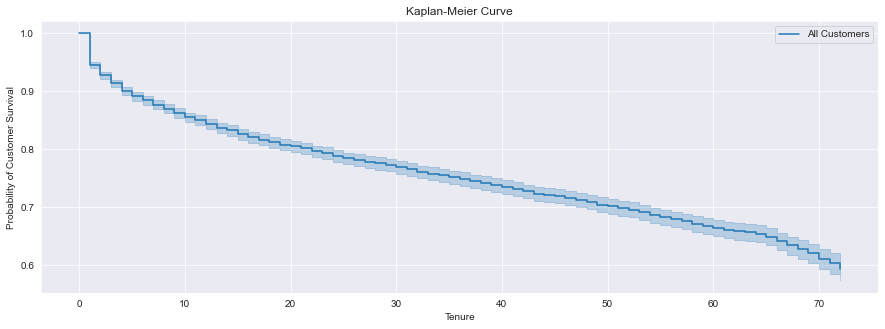

In [23]:
# Create a KaplanMeier object
kmf = KaplanMeierFitter()

# Calculate the K-M curve for all groups
kmf.fit(timevar, event_observed=eventvar, label="All Customers")

# Plot the curve and assign labels
plt.figure(figsize=(15, 5))
kmf.plot()
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

- There is a sudden drop in the starting which says that after short tenure, customers starts churning rapidly and after that churning rate decreases. 
- To deal with that we can consider giving more discounts on long-term plans and make more customers to subscribe for long term plans.



### Log-rank test

We can use non-parametric method log-rank test to compare survival curves between different groups. 

The log-rank test assumes that the hazards of the groups are proportional. Under the null hypothesis, the probability of event across the groups is the same for all time points.

To test the null hypothesis, the log-rank test calculates the difference between the observed number of events and the number of events expected in each group proportional to the size of the groups at each time point an event is observed. 

The log-rank test statistic for group $j$ $(k_{j})$ follows a $\chi^2$ distribution and is calculated as:
    
$$k_{j} = \frac{(O_{j}-E_{j})^{2}}{var(O_{j}-E_{j})}$$

$O_{j}-E_{j}$ is calculated as:

$$O_{j}-E_{j} = \sum_{i}(o_{ij}-e_{ij})$$ 

and $var(O_{j}-E_{j})$ is:

$$var(O_{j}-E_{j}) = o_{i}\frac{n_{ij}}{n_{i}}\Big(1-\frac{n_{ij}}{n_{i}}\Big)\frac{(n_{i}-o_{i})}{(n_{i}-1)}$$
    
$o_{ij}$ is the observed number of events in group $j$ at time $i$ and $e_{ij}$ is the expected number of events in group $j$ at time $i$, which is calculated as $e_{ij} = \frac{n_{ij}}{n_i}{o_{i}}$. 

Note that $\frac{n_{ij}}{n_i}$ is the proportion of units in group $j$ at risk of event at time $i$ ($n_{ij}$) to the number of units in all groups at risk of event at time $i$ ($n_{i}$) and ${o_{i}}$ is the observed number of events in all groups at time $i$.

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09

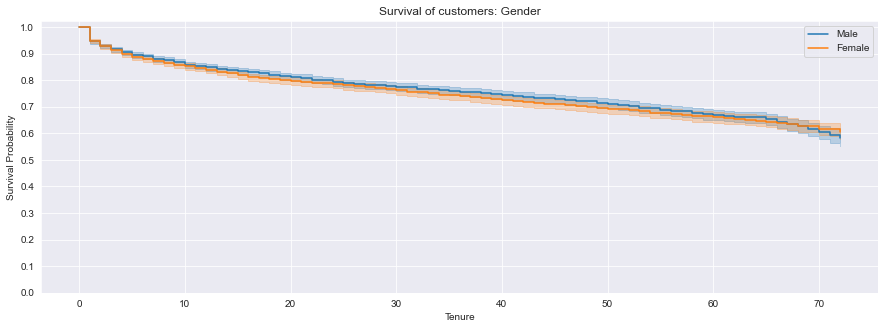

In [24]:
# Gender 

male = (survivaldata['gender_1'] == 0)
female = (survivaldata['gender_1'] == 1)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[male], event_observed=eventvar[male], label="Male")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[female],event_observed=eventvar[female], label="Female")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Gender')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))

groups = logrank_test(timevar[male], timevar[female], event_observed_A=eventvar[male], event_observed_B=eventvar[female])
groups.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         109.49 <0.005     82.71

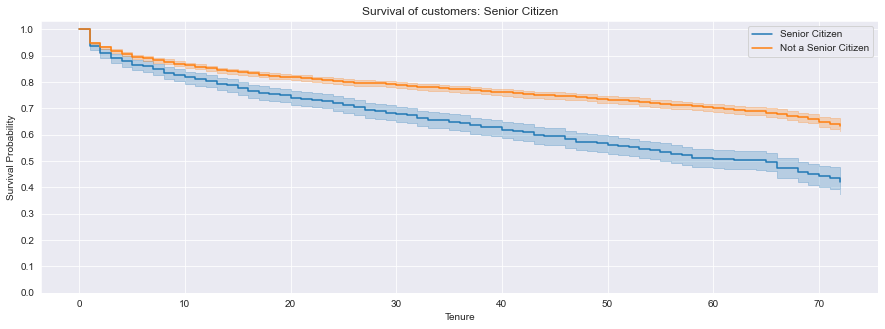

In [25]:
# Senior Citizen 
SeniorCitizen = (survivaldata['SeniorCitizen_1'] == 1)
no_SeniorCitizen = (survivaldata['SeniorCitizen_1'] == 0)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[SeniorCitizen],event_observed = eventvar[SeniorCitizen],label = "Senior Citizen")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_SeniorCitizen],event_observed = eventvar[no_SeniorCitizen],label = "Not a Senior Citizen")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Senior Citizen')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[SeniorCitizen], timevar[no_SeniorCitizen], event_observed_A=eventvar[SeniorCitizen], event_observed_B=eventvar[no_SeniorCitizen])
groups.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         423.54 <0.005    310.21

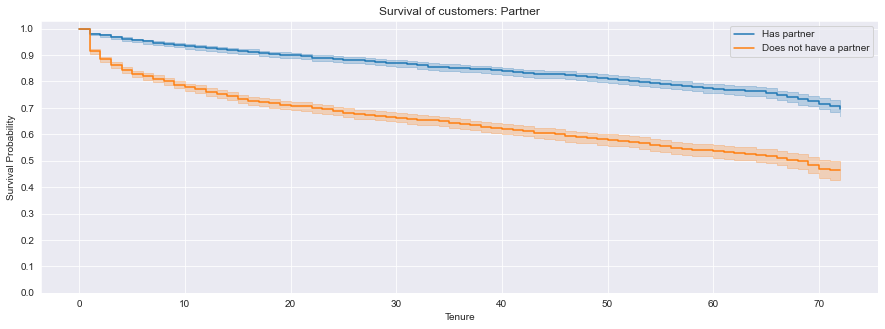

In [26]:
# Partner
partner = (survivaldata['Partner_1'] == 1)
no_partner = (survivaldata['Partner_1'] == 0)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[partner],event_observed = eventvar[partner],label = "Has partner")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_partner],event_observed = eventvar[no_partner],label = "Does not have a partner")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Partner')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[partner], timevar[no_partner], event_observed_A=eventvar[partner], event_observed_B=eventvar[no_partner])
groups.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         232.70 <0.005    172.12

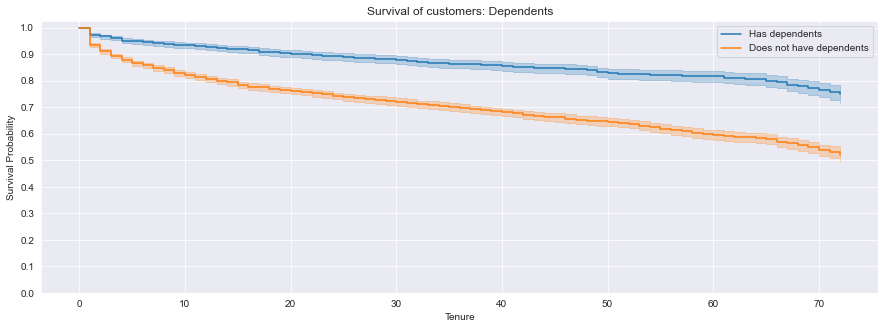

In [27]:
# Dependents
Dependents = (survivaldata['Dependents_1'] == 1)
no_Dependents = (survivaldata['Dependents_1'] == 0)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Dependents],event_observed = eventvar[Dependents],label = "Has dependents")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_Dependents],event_observed = eventvar[no_Dependents],label = "Does not have dependents")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Dependents')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[Dependents], timevar[no_Dependents], event_observed_A=eventvar[Dependents], event_observed_B=eventvar[no_Dependents])
groups.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.97

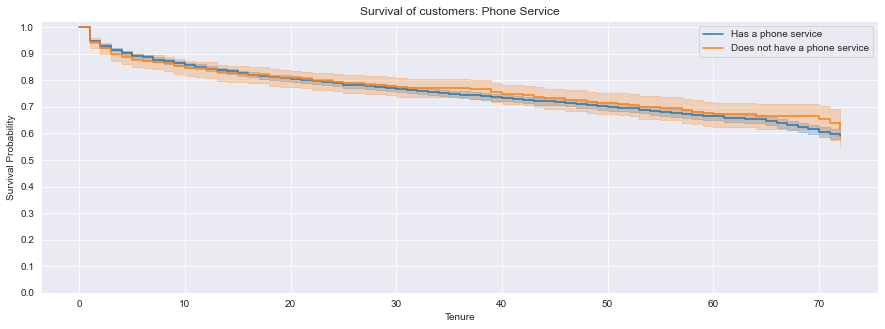

In [28]:
# PhoneService
PhoneService = (survivaldata['PhoneService_1'] == 1)
no_PhoneService = (survivaldata['PhoneService_1'] == 0)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[PhoneService],event_observed = eventvar[PhoneService],label = "Has a phone service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],label = "Does not have a phone service")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Phone Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PhoneService], timevar[no_PhoneService], event_observed_A=eventvar[PhoneService], event_observed_B=eventvar[no_PhoneService])
groups.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          24.85 <0.005     20.62

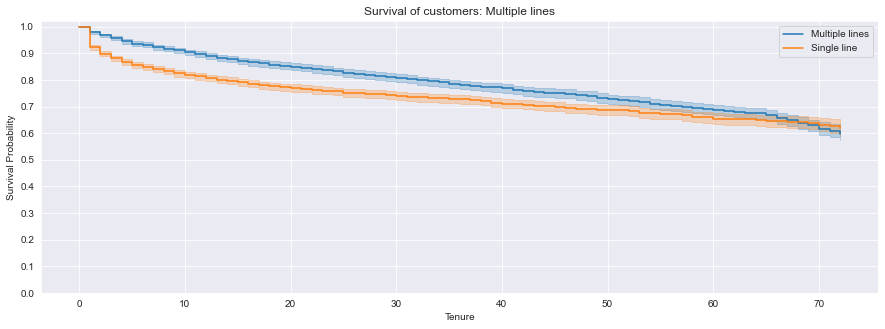

In [29]:
# Multiple lines
multiLines = (survivaldata['MultipleLines_1'] == 1)
no_multiLines = (survivaldata['MultipleLines_1'] == 0)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[multiLines], event_observed=eventvar[multiLines], label = "Multiple lines")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_multiLines], event_observed=eventvar[no_multiLines], label="Single line")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Multiple lines')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))

groups = logrank_test(timevar[multiLines], timevar[no_multiLines], event_observed_A=eventvar[multiLines], event_observed_B=eventvar[no_multiLines])
groups.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         520.12 <0.005    375.19

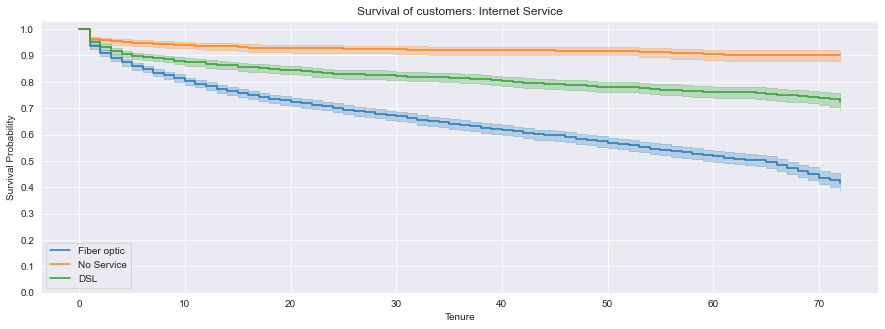

In [30]:
# Internet Service 
Fiber_optic = (survivaldata['InternetService_Fiber optic'] == 1)
No_Service = (survivaldata['InternetService_No'] == 1)
DSL = ((survivaldata['InternetService_Fiber optic'] == 0) & (survivaldata['InternetService_No'] == 0))

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Fiber_optic],event_observed = eventvar[Fiber_optic],label = "Fiber optic")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[No_Service],event_observed = eventvar[No_Service],label = "No Service")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[DSL],event_observed = eventvar[DSL],label = "DSL")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Internet Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['InternetService'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         367.17 <0.005    269.45

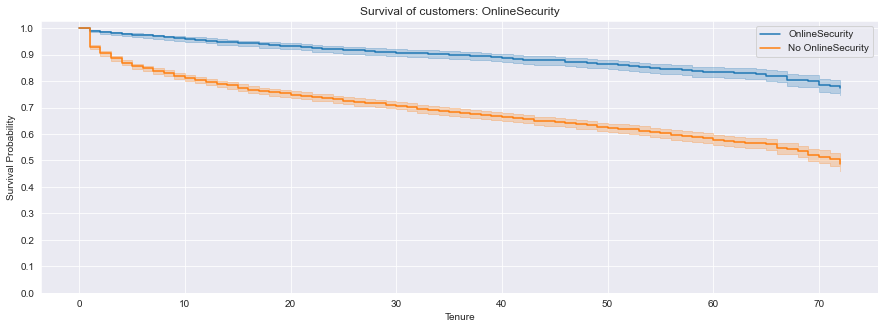

In [31]:
# Online Security
OnlineSecurity = (survivaldata['OnlineSecurity_1'] == 1)
no_OnlineSecurity = (survivaldata['OnlineSecurity_1'] == 0)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[OnlineSecurity], event_observed=eventvar[OnlineSecurity], label = "OnlineSecurity")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_OnlineSecurity], event_observed=eventvar[no_OnlineSecurity], label="No OnlineSecurity")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: OnlineSecurity')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))

groups = logrank_test(timevar[OnlineSecurity], timevar[no_OnlineSecurity], event_observed_A=eventvar[OnlineSecurity], event_observed_B=eventvar[no_OnlineSecurity])
groups.print_summary()


TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         196.62 <0.005    145.98

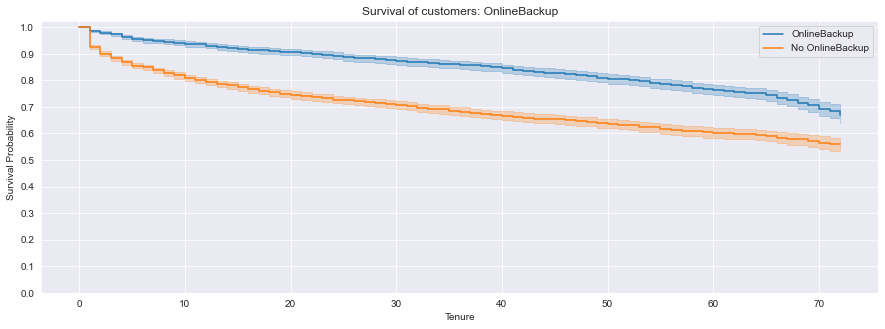

In [32]:
# OnlineBackup
OnlineBackup = (survivaldata['OnlineBackup_1'] == 1)
no_OnlineBackup = (survivaldata['OnlineBackup_1'] == 0)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[OnlineBackup], event_observed=eventvar[OnlineBackup], label = "OnlineBackup")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_OnlineBackup], event_observed=eventvar[no_OnlineBackup], label="No OnlineBackup")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: OnlineBackup')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))

groups = logrank_test(timevar[OnlineBackup], timevar[no_OnlineBackup], 
                      event_observed_A=eventvar[OnlineBackup], event_observed_B=eventvar[no_OnlineBackup])
groups.print_summary()


TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         167.21 <0.005    124.64

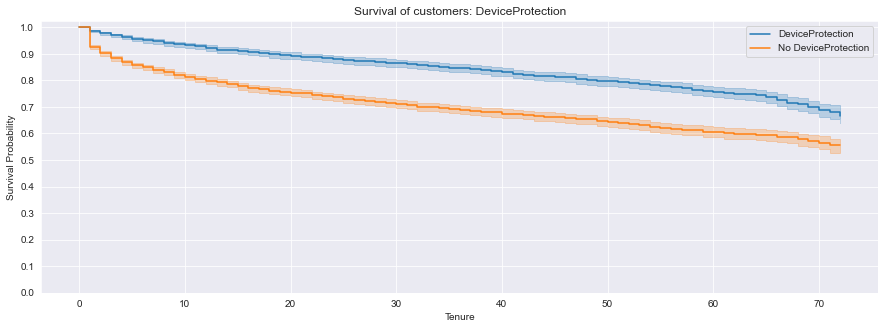

In [33]:
# DeviceProtection
DeviceProtection = (survivaldata['DeviceProtection_1'] == 1)
no_DeviceProtection = (survivaldata['DeviceProtection_1'] == 0)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[DeviceProtection], event_observed=eventvar[DeviceProtection], label = "DeviceProtection")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_DeviceProtection], event_observed=eventvar[no_DeviceProtection], label="No DeviceProtection")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: DeviceProtection')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))

groups = logrank_test(timevar[DeviceProtection], timevar[no_DeviceProtection], 
                      event_observed_A=eventvar[DeviceProtection], event_observed_B=eventvar[no_DeviceProtection])
groups.print_summary()


TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         865.24 <0.005    619.58

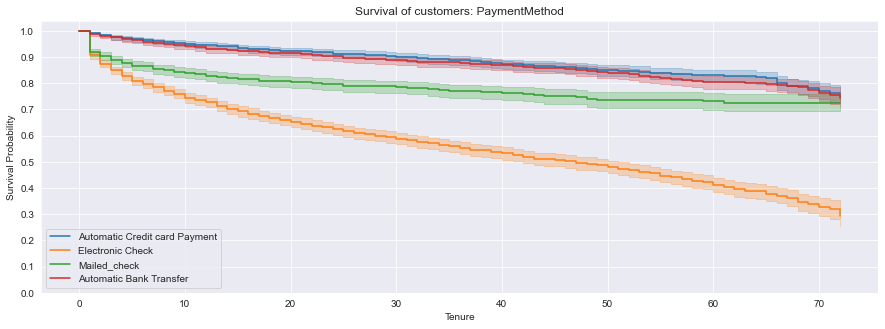

In [34]:
automatic_Credit_Card = (survivaldata['PaymentMethod_Credit card (automatic)'] == 1)
electronic_check = (survivaldata['PaymentMethod_Electronic check'] == 1)
mailed_check = (survivaldata['PaymentMethod_Mailed check'] == 1)
automatic_Bank_Transfer = ((survivaldata['PaymentMethod_Credit card (automatic)'] == 0) & (survivaldata['PaymentMethod_Electronic check'] == 0) & (survivaldata['PaymentMethod_Mailed check'] == 0))

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[automatic_Credit_Card],event_observed = eventvar[automatic_Credit_Card],label = "Automatic Credit card Payment")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[electronic_check],event_observed = eventvar[electronic_check],label = "Electronic Check")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[mailed_check],event_observed = eventvar[mailed_check],label = "Mailed_check")
plot3 = kmf.plot(ax = plot2)

kmf.fit(timevar[automatic_Bank_Transfer],event_observed = eventvar[automatic_Bank_Transfer],label = "Automatic Bank Transfer")
plot4 = kmf.plot(ax = plot3)
                 
plt.title('Survival of customers: PaymentMethod')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['PaymentMethod'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         189.51 <0.005    140.82

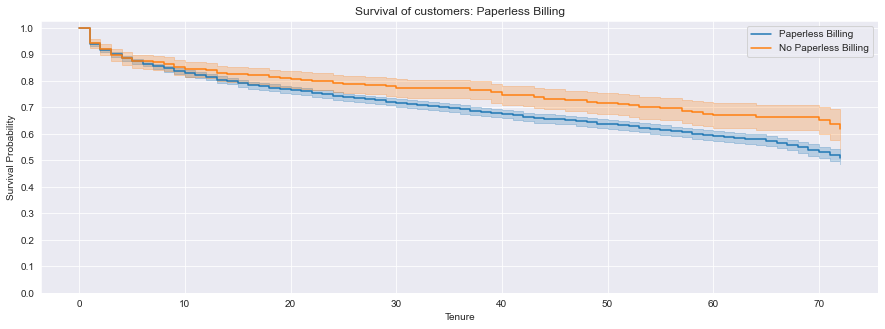

In [35]:
PaperlessBilling = (survivaldata['PaperlessBilling_1'] == 1)
no_PaperlessBilling = (survivaldata['PaperlessBilling_1'] == 0)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[PaperlessBilling],event_observed = eventvar[PaperlessBilling],label = "Paperless Billing")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],label = "No Paperless Billing")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Paperless Billing')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PaperlessBilling], timevar[no_PaperlessBilling], event_observed_A=eventvar[PaperlessBilling], event_observed_B=eventvar[no_PaperlessBilling])
groups.print_summary()

#### Survival Regression Analysis using Cox Proportional Hazard model


In [36]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df

df = datapreparation('./Telco-Customer-Churn.csv')


In [37]:
cph = CoxPHFitter()
cph.fit(df, duration_col='tenure', event_col='Churn')

cph.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12659.69
         time fit was run = 2022-10-15 19:58:38 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
gender                                  0.04       1.04       0.05            -0.05             0.13                 0.95                 1.14
SeniorCitizen                           0.03       1.04       0.06            -0.08             0.15                 0.93                 1.16
Partner                                -0.18       0.84       0.06            -0.29            -0.07                 0.75                 0.93
Dependents                             -0.09       0.91       0.07            -0.23             0.05                 0.80                 1.05
PhoneService                            0.83       2.29       0.47            -0.10             1.76                 0.90                 5.80
MultipleLines                           0.09       1.09       0.13            -0.16             0.33                 0.85                 1.40
OnlineSecurity                         -0.21       0.81       0.13            -0.47             0.05                 0.62                 1.05
OnlineBackup                           -0.06       0.95       0.13            -0.31             0.19                 0.74                 1.21
DeviceProtection                        0.09       1.09       0.13            -0.16             0.34                 0.85                 1.40
TechSupport                            -0.08       0.92       0.13            -0.34             0.17                 0.71                 1.19
StreamingTV                             0.28       1.32       0.24            -0.18             0.74                 0.83                 2.10
StreamingMovies                         0.29       1.33       0.24            -0.18             0.75                 0.84                 2.11
PaperlessBilling                        0.15       1.16       0.06             0.04             0.26                 1.04                 1.30
MonthlyCharges                          0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
InternetService_Fiber optic             1.02       2.77       0.58            -0.12             2.15                 0.89                 8.59
InternetService_No                     -2.34       0.10       0.60            -3.51            -1.17                 0.03                 0.31
Contract_One year                      -1.27       0.28       0.10            -1.46            -1.07                 0.23                 0.34
Contract_Two year                      -3.70       0.02       0.20            -4.10            -3.31                 0.02                 0.04
PaymentMethod_Credit card (automatic)  -0.01       0.99       0.09            -0.19             0.17                 0.83                 1.18
PaymentMethod_Electronic check          0.39       1.47       0.07             0.24             0.53                 1.28                 1.70
PaymentMethod_Mailed check              0.51       1.67       0.09             0.34             0.68                 1.40                 1.98

                                        cmp to      z      p   -log2(p)
covariate                                                              
gender                                    0.00   0.85   0.

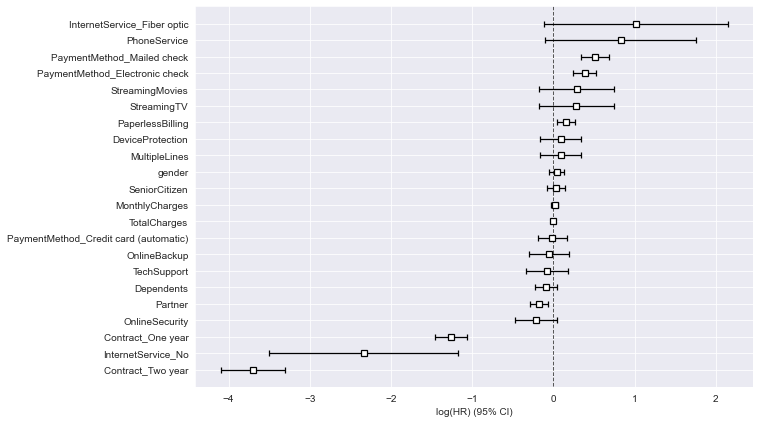

In [38]:
fig, ax = plt.subplots(figsize = (10,7))
cph.plot(ax = ax);

#### Predict cumulative hazard for a test sample

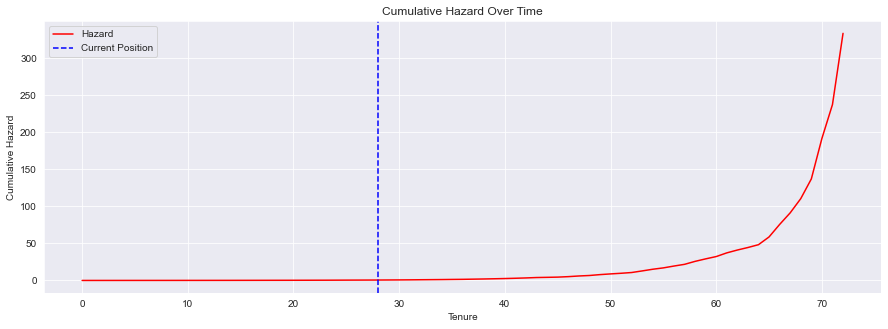

In [43]:
fig, ax = plt.subplots(figsize=(15,5))

test_sample = df.sample(1)
cph.predict_cumulative_hazard(test_sample).plot(ax = ax, color = 'red')

plt.axvline(x=test_sample.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Hazard','Current Position'])

ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');

#### Predict survival function for a test sample

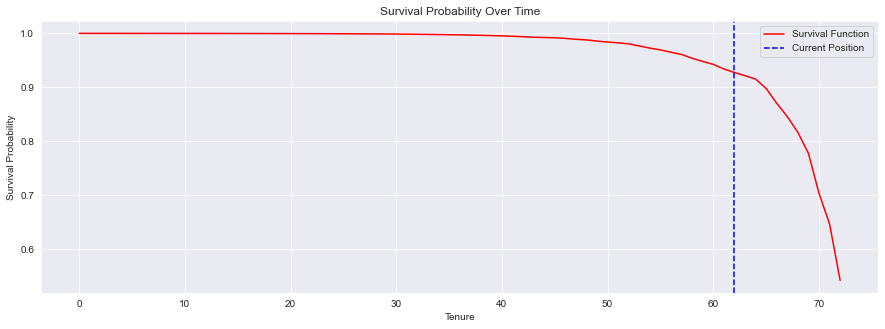

In [44]:
fig, ax = plt.subplots(figsize=(15,5))

test_sample = df.sample(1)
cph.predict_survival_function(test_sample).plot(ax = ax, color = 'red')

plt.axvline(x=test_sample.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])

ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time');

#### Customer Lifetime Value

To calculate customer lifetime value, multiply the Monthly charges the customer is paying to Telcom and the expected life time of the customer.
Using the survival function of a customer to calculate its expected life time, consider the customer is churned when the survival probability of him is 10%

In [41]:
def lifetime_value(sample):
    life = cph.predict_survival_function(sample).reset_index()
    life.columns = ['Tenure', 'Probability']
    max_life = life.Tenure[life.Probability > 0.1].max()
    
    lifetime_val = max_life * sample['MonthlyCharges'].values[0]
    return lifetime_val

In [42]:
print('Lifetime value of the sample case above is:', lifetime_value(test_sample), 'dollars.')

Lifetime value of the sample case above is: 3638.2499999999995 dollars.


## Customer Churn Prediction

Build and tune random forest model for predicting churn probability of customers. 


In [43]:
!pip install imblearn --user 

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [45]:
train, test = train_test_split(df, test_size=0.2, random_state=111, stratify = df.Churn)

x = df.columns[df.columns!="Churn"]
y = "Churn"

train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

In [46]:
# model fitting
def churn_prediction(algo,
                     training_x,
                     training_y,
                     testing_x,
                     testing_y,
                     cols,
                     cf = 'coefficients'):
    algo.fit(training_x, training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]
    
    # coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    
    coef_sumry = (pd.merge(coefficients,
                           column_df,
                           left_index= True,
                           right_index= True, 
                           how="left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print(algo)
    print("\n Classification report : \n", classification_report(testing_y,predictions))
    print("Accuracy Score: ",accuracy_score(testing_y,predictions))
    
    # confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    plt.figure(figsize=(10, 10))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt="d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    # roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, probabilities) 
    print ("Area under curve : ", model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y, probabilities)
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    
    plt.show()

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=14,
                       min_samples_leaf=8, min_samples_split=6,
                       n_estimators=1000, n_jobs=-1, random_state=42)

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.55      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Accuracy Score:  0.7686302342086586
Area under curve :  0.8487509364747218 



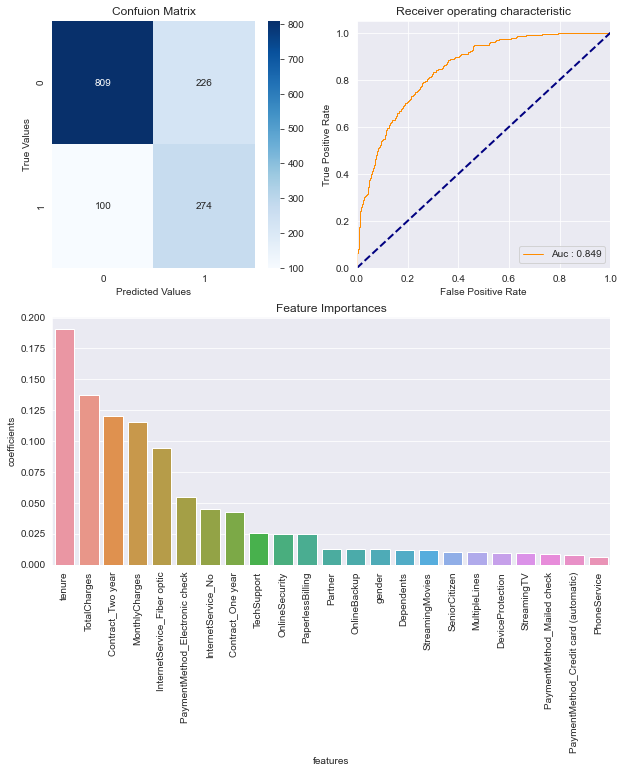

In [57]:
model = RandomForestClassifier(bootstrap=True, 
                               class_weight={0: 1, 1: 3},
                               criterion='gini', 
                               max_depth=14, 
                               max_features='sqrt',
                               min_samples_leaf=8,
                               min_samples_split=6,
                               n_estimators=1000,
                               n_jobs=-1, 
                               random_state=42,
                               verbose=0)

churn_prediction(model, train_x, train_y, test_x, test_y, x,"features")

In [58]:
# also checking performance on train data
train_scores = cross_val_score(model, train_x, train_y, cv = 5, scoring='f1')
print(np.mean(train_scores))

0.6338639425037959


#### Saving model

In [59]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

#### Explaining the model

In [60]:
# !pip install PDPbox --user
# !pip install eli5 --user 

In [86]:
# ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots

perm = PermutationImportance(model, random_state=42).fit(test_x, test_y)
eli5.show_weights(perm, 
                  feature_names=test_x.columns.tolist())

Weight,Feature
0.0219 ± 0.0079,InternetService_Fiber optic
0.0097 ± 0.0117,tenure
0.0084 ± 0.0066,Contract_One year
0.0054 ± 0.0069,InternetService_No
0.0018 ± 0.0063,TechSupport
0.0017 ± 0.0037,gender
0.0009 ± 0.0064,Contract_Two year
0.0007 ± 0.0020,OnlineBackup
-0.0003 ± 0.0021,PaymentMethod_Credit card (automatic)
-0.0003 ± 0.0069,Dependents


In [ ]:
eli5

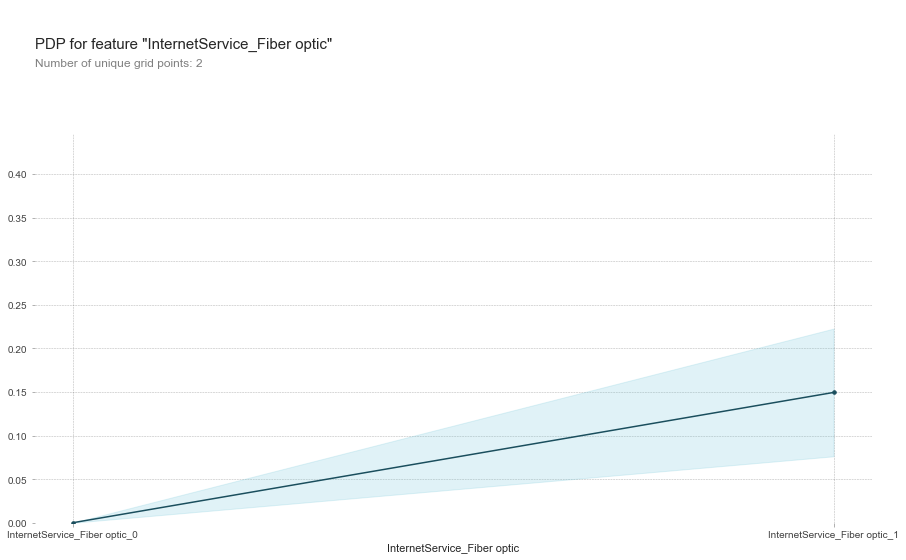

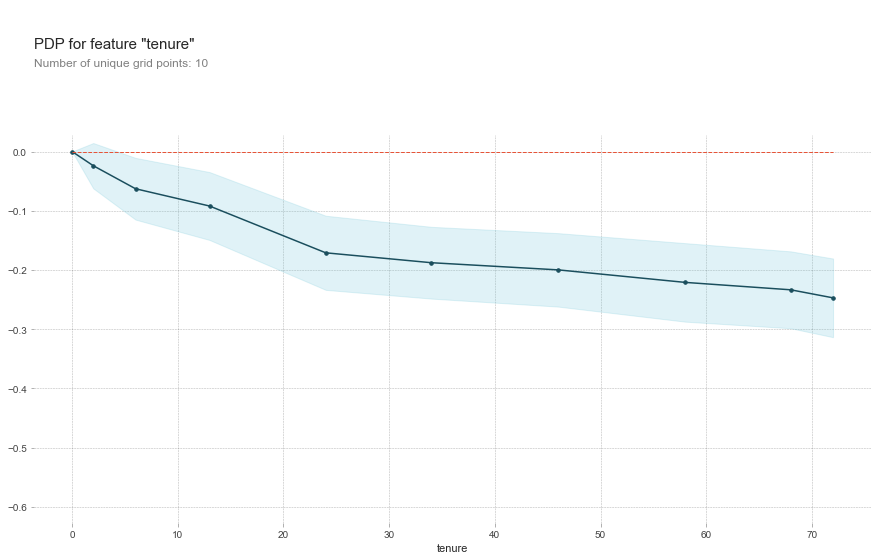

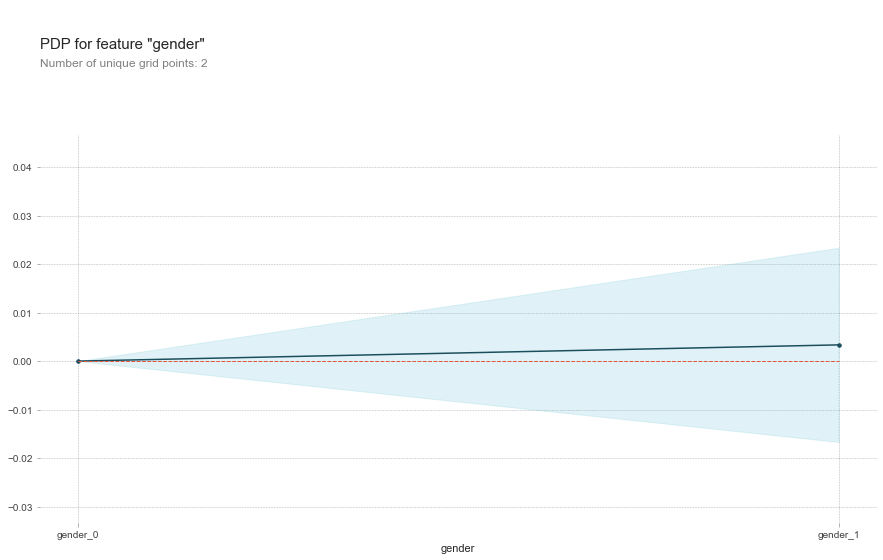

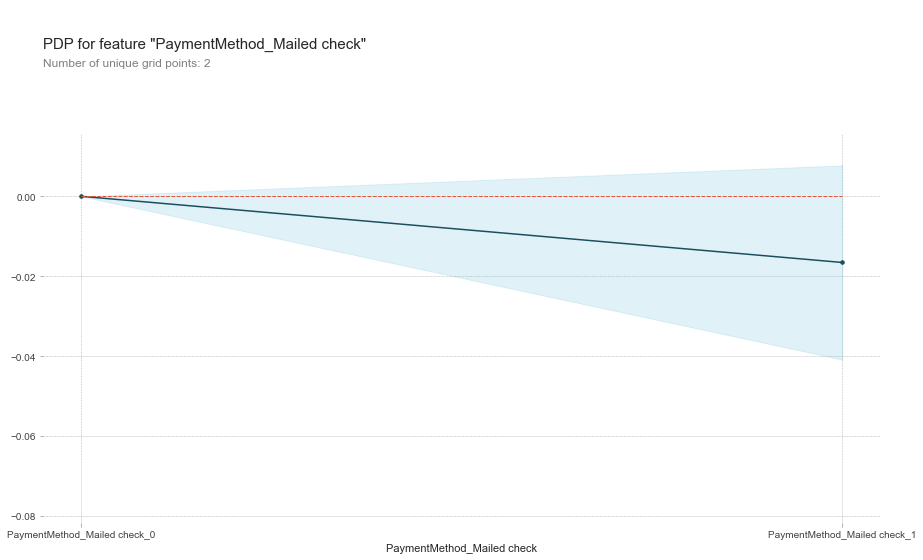

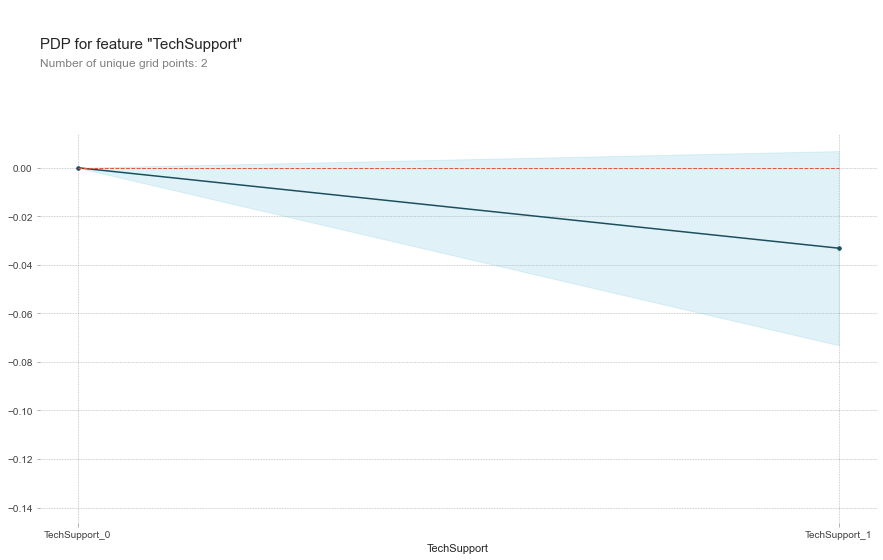

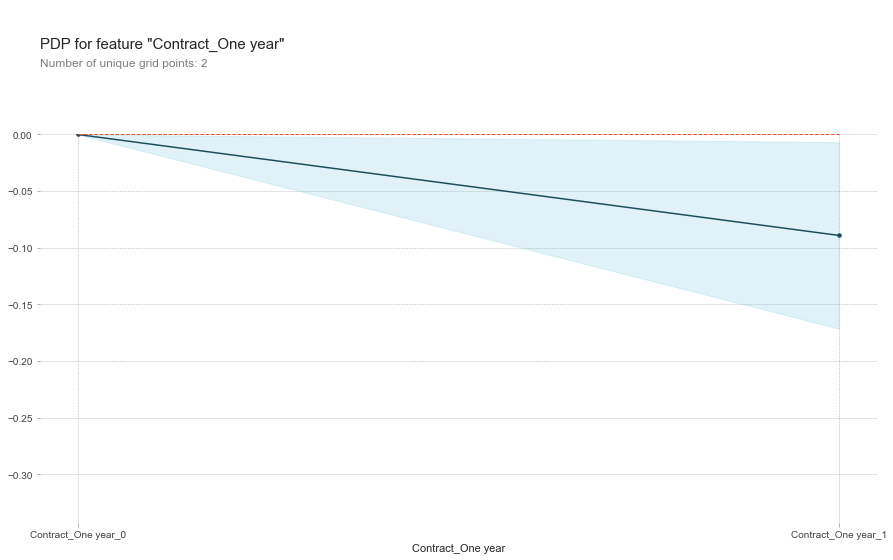

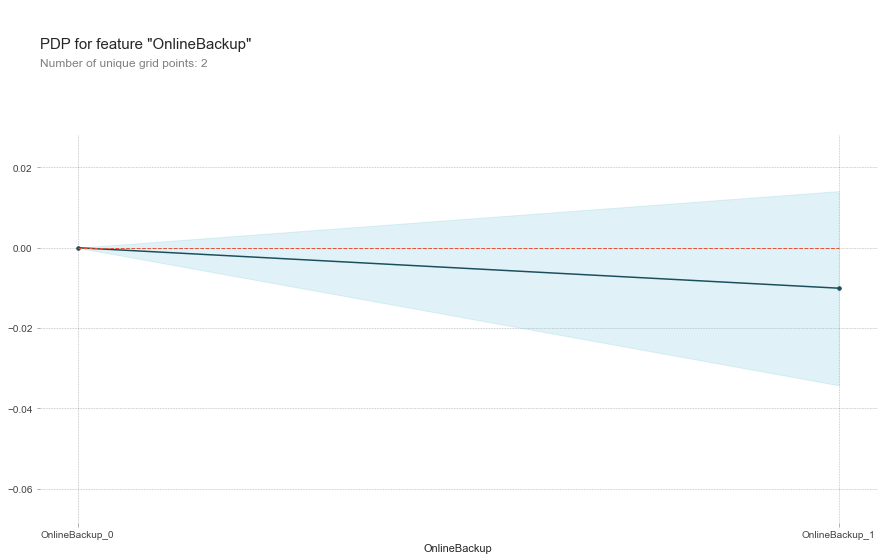

In [64]:
# partial dependance plots for top features
for col in ['InternetService_Fiber optic', 'tenure', 'gender', 
            'PaymentMethod_Mailed check', 'TechSupport', 'Contract_One year', 'OnlineBackup']:
    pdp_p = pdp.pdp_isolate(model=model, 
                            dataset=test_x, 
                            model_features=test_x.columns.values, 
                            feature=col)
    pdp.pdp_plot(pdp_p, col)
    plt.show()

#### Shap values

In [69]:
# !pip install shap --user

In [85]:
import joblib

# SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. 
# SHAP connects game theory with local explanations, uniting several previous methods and representing the only
# possible consistent and locally accurate additive feature attribution method based on expectations.
import shap 
shap.initjs()

explainer = shap.TreeExplainer(model)

# take a sample from test set
shap_values = explainer.shap_values(np.array(test_x.iloc[0]))

# Visualize the given SHAP values with an additive force layout.
shap.force_plot(explainer.expected_value[1], shap_values[1], test_x.iloc[0])

In [77]:
# Saving Explainer
explainer_filename = 'ModelExplainer.bz2'
joblib.dump(explainer, 
            filename=explainer_filename, 
            compress=('bz2', 9))

['explainer.bz2']

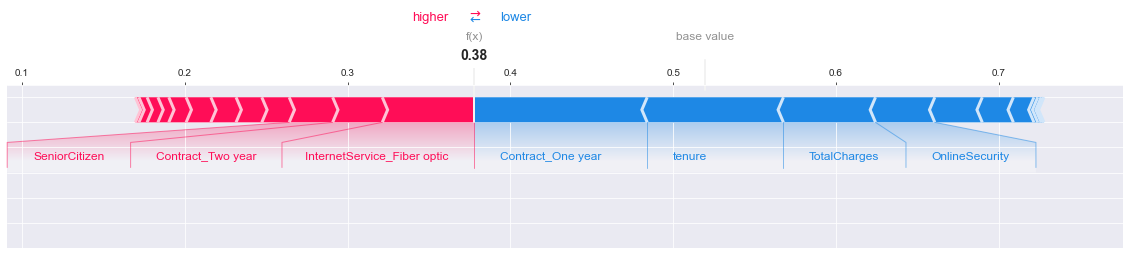

In [79]:
# loading explainer
explainer = joblib.load(filename="ModelExplainer.bz2")
shap_values = explainer.shap_values(np.array(test_x.iloc[0]))
shap.force_plot(explainer.expected_value[1], 
                shap_values[1], list(test_x.columns), 
                matplotlib=True, 
                show = False).savefig('SHAPValues.png', 
                                      bbox_inches="tight")    

#### Gauge chart

In [83]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], 
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], 
          Probability=1, 
          fname='ChurnGauge.jpg'): 
    
    N = len(labels)
    colors = colors[::-1]
    
    fig, ax = plt.subplots()
    ang_range, mid_points = degree_range(4)
    labels = labels[::-1]
    
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    for mid, lab in zip(mid_points, labels): 
        ax.text(0.35 * np.cos(np.radians(mid)), 
                0.35 * np.sin(np.radians(mid)), 
                lab, 
                horizontalalignment='center', 
                verticalalignment='center', 
                fontsize=14, 
                fontweight='bold', 
                rotation=rot_text(mid))

    # set the bottom banner and the title
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, 
            -0.05, 
            'Churn Probability ' + np.round(Probability,2).astype(str), 
            horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=22, 
            fontweight='bold')

    
    # plot the arrow now   
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    
    # remove frame and ticks, and makes axis equal and tight
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    
    # save figure
    if fname:
        fig.savefig(fname, dpi=200)

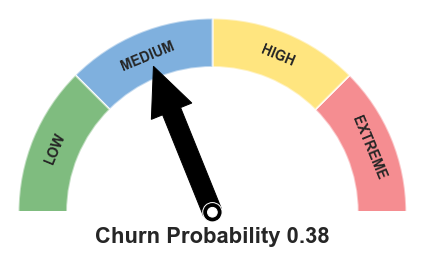

In [84]:
gauge(Probability=model.predict_proba(test_x.iloc[0:1])[0,1])